# Assignment 10

*(Due Saturday, November 30, 2019 at noon.)*

In [29]:
#### LOAD PACKAGES 
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

#Graphics settings
%matplotlib inline
sns.set()

In [30]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


1) Create a linear regression model to predict `tips.tip` from the other variables in the `tips` dataset. Print the model's `summary()`.



**Hints:**
1. You'll need to create dummy variables for `Day`, if you use it. `sex`, `time` and `smoker` can just be converted to integer (0 or 1) fields.
2. Try creating a scatterplot matrix (see Seaborn's [`.pairplot()`](https://seaborn.pydata.org/generated/seaborn.pairplot.html) function) to help decide which variables are likely to be useful.

In [31]:
#to convert categorical column
tips['_sex'] = np.where((tips['sex'] == "Female"), 0, 1)
tips['_time'] = np.where((tips['time'] == "Lunch"), 0, 1)
tips['_smoker'] = np.where((tips['smoker'] == "No"), 0, 1)
tips.head()

,total_bill,tip,sex,smoker,day,time,size,_sex,_time,_smoker
0,16.99,1.01,Female,No,Sun,Dinner,2,0,1,0
1,10.34,1.66,Male,No,Sun,Dinner,3,1,1,0
2,21.01,3.50,Male,No,Sun,Dinner,3,1,1,0
3,23.68,3.31,Male,No,Sun,Dinner,2,1,1,0
4,24.59,3.61,Female,No,Sun,Dinner,4,0,1,0


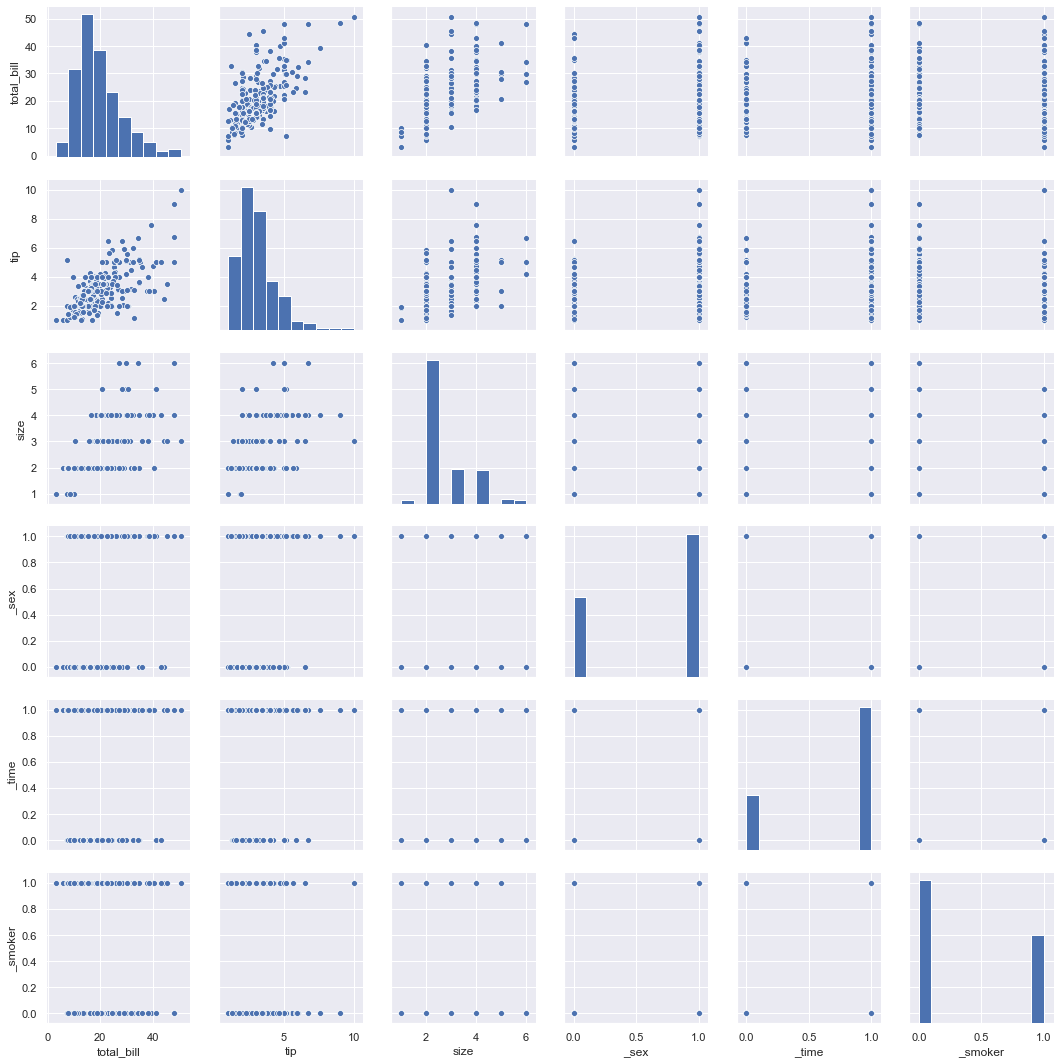

In [26]:
#to see which variables are likely to be useful
sns.pairplot(tips)
plt.show()

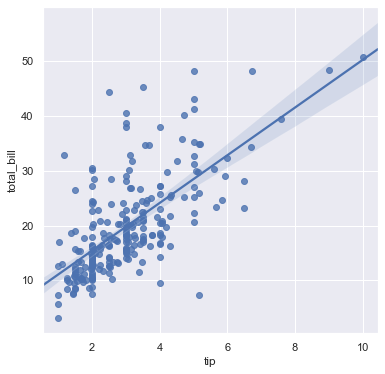

In [55]:
#plot tip vs total bill
plt.figure(figsize=(6,6))
sns.regplot('tip', 'total_bill', data = tips)
plt.show()

In [56]:
#Create a linear regression model to predict tips.tip from the other variables in the tips dataset. 
#Print the model's summary()

x = sm.add_constant(tips[['total_bill']])
y = tips.tip

lm = sm.OLS(y, x).fit()

# Residual Sum of Squares
RSS = sum(lm.resid ** 2)

# Total Sum of Squares
TSS = sum((tips.tip - np.mean(tips.tip)) ** 2)
R2 = 1 - (RSS/TSS)

#print('RSS: {}; TSS: {}; R-squared: {}'.format(RSS, TSS, R2))

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     203.4
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           6.69e-34
Time:                        07:48:16   Log-Likelihood:                -350.54
No. Observations:                 244   AIC:                             705.1
Df Residuals:                     242   BIC:                             712.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9203      0.160      5.761      0.000       0.606       1.235
total_bill     0.1050      0.007     14.260      0.000       0.091       0.120
==============================================================================
Omnibus:                       20.185   Durbin-Watson:                   2.151
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.750
Skew:                           0.443   Prob(JB):                     6.35e-09
Kurtosis:                       4.711   Cond. No.                         53.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
#How well does this model explain the data? What fraction of the variation in y is "explained" by the model?
print("R-squared: %2.2f%%" % (lm.rsquared*100))
print("Adjusted R-squared: %2.2f%%" % (lm.rsquared_adj * 100))

R-squared: 45.66%
Adjusted R-squared: 45.44%


2) Provide a linear function like this one from the class notes:  
    
**Box(Rate, User) = -229.0106 + 54.9285Rate + .4472User**

In [63]:
#add more predictor
x = sm.add_constant(tips[['total_bill', 'size']])
y = tips.tip

lm = sm.OLS(y, x).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     105.9
Date:                Fri, 29 Nov 2019   Prob (F-statistic):           9.67e-34
Time:                        07:54:54   Log-Likelihood:                -347.99
No. Observations:                 244   AIC:                             702.0
Df Residuals:                     241   BIC:                             712.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6689      0.194      3.455      0.001       0.288       1.050
total_bill     0.0927      0.009     10.172      0.000       0.075       0.111
size           0.1926      0.085      2.258      0.025       0.025       0.361
==============================================================================
Omnibus:                       24.753   Durbin-Watson:                   2.100
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.169
Skew:                           0.545   Prob(JB):                     9.43e-11
Kurtosis:                       4.831   Cond. No.                         67.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#Provide a linear function
    
**tips(total_bill, size) = 0.6689 + 0.0927total_bill + 0.1926size**

In [64]:
#How well does this model explain the data? What fraction of the variation in y is "explained" by the model?
print("R-squared: %2.2f%%" % (lm.rsquared*100))
print("Adjusted R-squared: %2.2f%%" % (lm.rsquared_adj * 100))

R-squared: 46.79%
Adjusted R-squared: 46.35%


3) Provide scatterplots of residuals against each predictor variable and the predicted values.

In [60]:
#get model's predictor values
dir(lm)
print("All predictions:", lm.predict())

predict = lm.get_prediction((1, 10, 400))
print()
print("95% confidence interval:", predict.conf_int(alpha=.05))

predict.summary_frame()

All predictions: [2.72117624 1.99477235 3.1176016  3.39857199 3.52094215 3.56799609
 1.82955755 3.73531553 2.48936443 2.46200401 1.98740609 4.6437714
 2.52935272 2.84610212 2.49387435 3.17758404 2.02032874 2.62090487
 2.71907159 3.07971795 2.79243362 3.06844301 2.59279276 5.05492929
 2.99237509 2.78085806 2.31362639 2.24206839 3.19021192 3.00109431
 1.91163879 2.83768353 2.51807779 3.11053596 2.77770109 3.43856029
 2.62300952 2.7148623  2.87346253 4.19728558 2.59459678 2.74402673
 2.37360884 1.92531899 4.10573343 2.83136959 3.24598507 4.31619814
 3.91105357 2.8050615  2.22628354 2.01611945 4.59641684 1.95267941
 3.59640882 2.95764842 4.90655166 3.71246504 2.08948147 5.98623565
 3.0418343  2.35992863 2.06633035 2.83136959 2.75770694 3.01973551
 2.66435076 1.25634183 3.03552036 2.48620746 2.17156271 2.72959483
 3.7598196  3.59355248 2.48335111 2.01266185 2.79243362 3.76898989
 3.30175822 2.72613723 2.9523868  2.65984085 1.99296833 4.3456632
 2.58828284 4.59852148 2.27784739 2.83031726 3.

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,-8.657883,55.255231,-117.502743,100.186976,-117.521435,100.205669


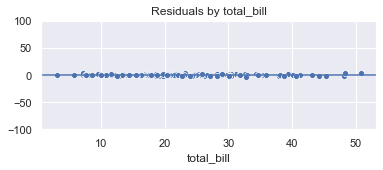

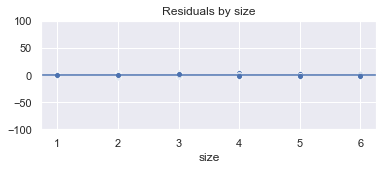

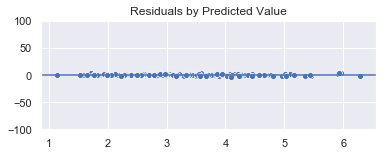

-1.9456203497119547e-15


In [65]:
for x in ('total_bill', 'size'):
    plt.figure(figsize=(6,2))
    sns.scatterplot(tips[x], lm.resid)
    plt.title("Residuals by %s" % x)
    plt.ylim(-100, 100)
    #Put a horizontal line through the mean of the predictions.
    plt.axhline(np.mean(lm.resid))
    plt.show()

plt.figure(figsize=(6,2))
sns.scatterplot(lm.predict(), lm.resid)
plt.title("Residuals by Predicted Value")
plt.ylim(-100, 100)
plt.axhline(np.mean(lm.resid))
plt.show()

print(np.mean(lm.resid))

4) Does your model meet the four assumptions expected of a linear model? Explain:

**Assumptions**

Residuals should:

1. have a **mean close to zero** across the distribution;
> yes
2. have **constant variance** (the vertical spread of the points remains approximately constant across the graph);
> yes
3. have an approximately **normal distribution**--points tend to be closer to zero on the y axis, with gradually fewer appearing farther away; 
> no
4. appear **independent** of one another--they seem to be distributed randomly. You shouldn't see a relationship between your input variable(s) and the residuals.
> no

Hence, the model doesn't meet the four assumptions expected of a linear model.